<a href="https://colab.research.google.com/github/obanlatomiwa/Hamoye-Submissions/blob/master/Hamoye_StageB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
# importing required modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import  mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet
%matplotlib inline

In [51]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [52]:
# To answer some questions, you will need to normalize the dataset using the 
# MinMaxScaler after removing the following columns: [“date”, “lights”]. 
# The target variable is “Appliances”. Use a 70-30 train-test set split with a  
# random state of 42 (for reproducibility). Run a multiple linear regression 
# using the training set and evaluate your model on the test set.

In [53]:
data = data.drop(['lights', 'date'], axis = 1)
data.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [54]:
# Renaming columns
columns = {'Appliances': 'Appliances', 'T1': 'Temp-kitchen',
           'RH_1': 'Humidity-kitchen', 'T2': 'Temp-living-room', 
           'RH_2': 'Humidity-living-room', 'T3': 'Temp-laundry-room',
           'RH_3': 'Humidity-laundry-room', 'T4': 'Temp-office-room',
           'RH_4': 'Humidity-office-room', 'T5': 'Temp-bathroom',
           'RH_5': 'Humidity-bathroom', 'T6': 'Temp-outside(north side)',
           'RH_6': 'Humidity-outside(north side)', 'T7': 'Temp-ironing-room',
           'RH_7': 'Humidity-ironing-room', 'T8': 'Temp-teenager-room2', 
           'RH_8': 'Humidity-teenager-room2', 'T9': 'Temp-parents-room',
           'RH_9': 'Humidity-parents-room', 'Press_mm_hg': 'Pressure-mmHg', 
           'RH_out': 'Humidity-outside', 'rv1': 'Random-variable1', 'rv2': 'Random-variable2'}

In [55]:
data = data.rename(columns=columns)
data.head()  

,Appliances,Temp-kitchen,Humidity-kitchen,Temp-living-room,Humidity-living-room,Temp-laundry-room,Humidity-laundry-room,Temp-office-room,Humidity-office-room,Temp-bathroom,Humidity-bathroom,Temp-outside(north side),Humidity-outside(north side),Temp-ironing-room,Humidity-ironing-room,Temp-teenager-room2,Humidity-teenager-room2,Temp-parents-room,Humidity-parents-room,T_out,Pressure-mmHg,Humidity-outside,Windspeed,Visibility,Tdewpoint,Random-variable1,Random-variable2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [56]:
# dataset statictics

data.describe()

,Appliances,Temp-kitchen,Humidity-kitchen,Temp-living-room,Humidity-living-room,Temp-laundry-room,Humidity-laundry-room,Temp-office-room,Humidity-office-room,Temp-bathroom,Humidity-bathroom,Temp-outside(north side),Humidity-outside(north side),Temp-ironing-room,Humidity-ironing-room,Temp-teenager-room2,Humidity-teenager-room2,Temp-parents-room,Humidity-parents-room,T_out,Pressure-mmHg,Humidity-outside,Windspeed,Visibility,Tdewpoint,Random-variable1,Random-variable2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [57]:
# check for any null data 
data.isnull().any()

Appliances                      False
Temp-kitchen                    False
Humidity-kitchen                False
Temp-living-room                False
Humidity-living-room            False
Temp-laundry-room               False
Humidity-laundry-room           False
Temp-office-room                False
Humidity-office-room            False
Temp-bathroom                   False
Humidity-bathroom               False
Temp-outside(north side)        False
Humidity-outside(north side)    False
Temp-ironing-room               False
Humidity-ironing-room           False
Temp-teenager-room2             False
Humidity-teenager-room2         False
Temp-parents-room               False
Humidity-parents-room           False
T_out                           False
Pressure-mmHg                   False
Humidity-outside                False
Windspeed                       False
Visibility                      False
Tdewpoint                       False
Random-variable1                False
Random-varia

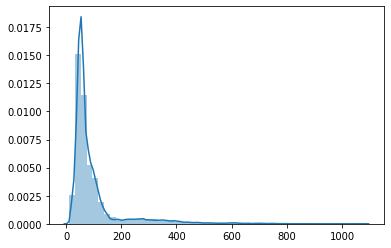

In [58]:
sns.distplot(data[['Appliances']])


In [59]:
# Normalizing data

scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
normalised_df

,Appliances,Temp-kitchen,Humidity-kitchen,Temp-living-room,Humidity-living-room,Temp-laundry-room,Humidity-laundry-room,Temp-office-room,Humidity-office-room,Temp-bathroom,Humidity-bathroom,Temp-outside(north side),Humidity-outside(north side),Temp-ironing-room,Humidity-ironing-room,Temp-teenager-room2,Humidity-teenager-room2,Temp-parents-room,Humidity-parents-room,T_out,Pressure-mmHg,Humidity-outside,Windspeed,Visibility,Tdewpoint,Random-variable1,Random-variable2
0,0.046729,0.327350,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,0.381070,0.841827,0.170594,0.653428,0.173329,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.327350,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,0.375443,0.839872,0.170594,0.651064,0.173329,0.660155,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.327350,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,0.367487,0.830704,0.170594,0.646572,0.173329,0.655586,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.327350,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,0.363800,0.833401,0.164310,0.641489,0.164175,0.650788,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.327350,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,0.361859,0.848264,0.170594,0.639362,0.164175,0.650788,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.084112,0.926786,0.537657,0.711655,0.606309,0.830841,0.579374,0.864865,0.765258,0.752031,0.339590,0.898317,0.000000,0.858624,0.755319,0.768386,0.701645,0.864724,0.729443,0.891747,0.602326,0.416667,0.238095,0.348718,0.901961,0.861981,0.861981
19731,0.074766,0.919747,0.536006,0.701769,0.607836,0.825302,0.582178,0.864865,0.765258,0.754897,0.338487,0.880852,0.000000,0.864010,0.752280,0.768386,0.691912,0.864724,0.729443,0.887460,0.602326,0.421053,0.250000,0.361538,0.900452,0.985726,0.985726
19732,0.242991,0.919747,0.538666,0.692651,0.627198,0.818378,0.603988,0.864865,0.771233,0.754897,0.337585,0.864260,0.000000,0.862394,0.751773,0.768386,0.687457,0.864724,0.729443,0.883173,0.602326,0.425439,0.261905,0.374359,0.898944,0.583979,0.583979
19733,0.383178,0.919747,0.549491,0.677054,0.634717,0.805085,0.585294,0.864865,0.773794,0.752031,0.336583,0.829525,0.000000,0.858624,0.748075,0.764953,0.682617,0.864724,0.730581,0.878885,0.602326,0.429825,0.273810,0.387179,0.897436,0.126371,0.126371


In [60]:
# features

features_df = normalised_df.drop(columns=['Appliances'])
features_df

,Temp-kitchen,Humidity-kitchen,Temp-living-room,Humidity-living-room,Temp-laundry-room,Humidity-laundry-room,Temp-office-room,Humidity-office-room,Temp-bathroom,Humidity-bathroom,Temp-outside(north side),Humidity-outside(north side),Temp-ironing-room,Humidity-ironing-room,Temp-teenager-room2,Humidity-teenager-room2,Temp-parents-room,Humidity-parents-room,T_out,Pressure-mmHg,Humidity-outside,Windspeed,Visibility,Tdewpoint,Random-variable1,Random-variable2
0,0.327350,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,0.381070,0.841827,0.170594,0.653428,0.173329,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.327350,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,0.375443,0.839872,0.170594,0.651064,0.173329,0.660155,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.327350,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,0.367487,0.830704,0.170594,0.646572,0.173329,0.655586,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.327350,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,0.363800,0.833401,0.164310,0.641489,0.164175,0.650788,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.327350,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,0.361859,0.848264,0.170594,0.639362,0.164175,0.650788,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.926786,0.537657,0.711655,0.606309,0.830841,0.579374,0.864865,0.765258,0.752031,0.339590,0.898317,0.000000,0.858624,0.755319,0.768386,0.701645,0.864724,0.729443,0.891747,0.602326,0.416667,0.238095,0.348718,0.901961,0.861981,0.861981
19731,0.919747,0.536006,0.701769,0.607836,0.825302,0.582178,0.864865,0.765258,0.754897,0.338487,0.880852,0.000000,0.864010,0.752280,0.768386,0.691912,0.864724,0.729443,0.887460,0.602326,0.421053,0.250000,0.361538,0.900452,0.985726,0.985726
19732,0.919747,0.538666,0.692651,0.627198,0.818378,0.603988,0.864865,0.771233,0.754897,0.337585,0.864260,0.000000,0.862394,0.751773,0.768386,0.687457,0.864724,0.729443,0.883173,0.602326,0.425439,0.261905,0.374359,0.898944,0.583979,0.583979
19733,0.919747,0.549491,0.677054,0.634717,0.805085,0.585294,0.864865,0.773794,0.752031,0.336583,0.829525,0.000000,0.858624,0.748075,0.764953,0.682617,0.864724,0.730581,0.878885,0.602326,0.429825,0.273810,0.387179,0.897436,0.126371,0.126371


In [61]:
# target

target = normalised_df['Appliances']
target 

0        0.046729
1        0.046729
2        0.037383
3        0.037383
4        0.046729
           ...   
19730    0.084112
19731    0.074766
19732    0.242991
19733    0.383178
19734    0.392523
Name: Appliances, Length: 19735, dtype: float64

In [62]:
# dataset splitting

X_train, X_test, y_train, y_test = train_test_split(features_df, target, test_size=0.3, random_state=42)
linear_model = LinearRegression()

In [63]:
#fit the model to the training dataset

linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
#obtain predictions
predicted_values = linear_model.predict(X_test)
predicted_values


array([0.03322207, 0.24411599, 0.03400024, ..., 0.06844707, 0.10032325,
       0.05722198])

In [65]:
# Linear Regression data 
print('intercept:', linear_model.intercept_)
print('slope/weight:', linear_model.coef_)

intercept: 0.1529029588225302
slope/weight: [-0.00328105  0.5535466  -0.23617792 -0.45669795  0.29062714  0.09604827
  0.028981    0.02638578 -0.01565684  0.01600579  0.23642491  0.03804865
  0.01031878 -0.04461364  0.10199505 -0.15759548 -0.18994077 -0.03980032
 -0.32185967  0.00683933 -0.07767065  0.02918313  0.01230661  0.11775773
  0.0007701   0.0007701 ]


In [66]:
# Mean Absolute Error 

MAE = mean_absolute_error(y_test, predicted_values)
round(MAE, 2)

0.05

In [73]:
# R2 Score

r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2)

0.15

In [74]:
# Root Mean Square Error (RMSE)

RMSE = np.sqrt(mean_squared_error(y_test, predicted_values))
round(RMSE, 3) 

0.088

In [84]:
# Residual Sum of Squares?
RSS = (sum(y_test) - sum(predicted_values)) ** 2
round(RSS, 2)

49.96

In [21]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

In [75]:
# Ridge Regression

ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(X_train, y_train)


Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [76]:
# evaluating ridge regression of test set 
pred_ridge_reg = ridge_reg.predict(X_test)

In [77]:
# Root Mean Square Error (RMSE) after Ridge Regression

RMSE = np.sqrt(mean_squared_error(y_test, pred_ridge_reg))
round(RMSE, 3) 

0.088

In [79]:
# Feature Selection and Lasso Regression

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [80]:
# evaluating lasso regression of test set 
pred_lasso_reg = lasso_reg.predict(X_test)

In [81]:
# Root Mean Square Error (RMSE) after lasso regression

RMSE = np.sqrt(mean_squared_error(y_test, pred_lasso_reg))
round(RMSE, 3) 

0.094

In [31]:
#  Comparing the Effects of regularisation

linear_model_weights = get_weights_df(linear_model, X_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, X_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, X_train, 'Lasso_weight')

In [32]:
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,Humidity-living-room,-0.456698,-0.411071,-0.000000
1,T_out,-0.321860,-0.262172,0.000000
2,Temp-living-room,-0.236178,-0.201397,0.000000
3,Temp-parents-room,-0.189941,-0.188916,-0.000000
4,Humidity-teenager-room2,-0.157595,-0.156830,-0.000110
5,Humidity-outside,-0.077671,-0.054724,-0.049557
6,Humidity-ironing-room,-0.044614,-0.045977,-0.000000
7,Humidity-parents-room,-0.039800,-0.041367,-0.000000
8,Temp-bathroom,-0.015657,-0.019853,-0.000000
9,Temp-kitchen,-0.003281,-0.018406,0.000000


In [34]:
# Question 12
data.head()

,Appliances,Temp-kitchen,Humidity-kitchen,Temp-living-room,Humidity-living-room,Temp-laundry-room,Humidity-laundry-room,Temp-office-room,Humidity-office-room,Temp-bathroom,Humidity-bathroom,Temp-outside(north side),Humidity-outside(north side),Temp-ironing-room,Humidity-ironing-room,Temp-teenager-room2,Humidity-teenager-room2,Temp-parents-room,Humidity-parents-room,T_out,Pressure-mmHg,Humidity-outside,Windspeed,Visibility,Tdewpoint,Random-variable1,Random-variable2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [37]:
data_X = data[['Temp-living-room']]
data_X.head()

,Temp-living-room
0,19.2
1,19.2
2,19.2
3,19.2
4,19.2


In [39]:
data_y  = data[['Temp-outside(north side)']]
data_y.head()

,Temp-outside(north side)
0,7.026667
1,6.833333
2,6.560000
3,6.433333
4,6.366667


In [41]:
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=42)
data_linear_model = LinearRegression()

In [43]:
data_linear_model.fit(data_X_train, data_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
data_predicted_values = data_linear_model.predict(data_X_test)
data_predicted_values


array([[ 2.15578912],
       [10.01116055],
       [ 1.87391554],
       ...,
       [ 4.24758774],
       [ 8.69822311],
       [ 4.9893603 ]])

In [49]:
data_r2_score = r2_score(data_y_test, data_predicted_values)
round(data_r2_score, 2)

0.64